# Importing Liabraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [39]:
dataset = pd.read_csv('Diabetic-Retinopathy.csv')

In [40]:
dataset.head()

,Unnamed: 0,id,laser,age,eye,trt,risk,time,status
0,1,5,argon,28,left,0,9,46.23,0
1,2,5,argon,28,right,1,9,46.23,0
2,3,14,xenon,12,left,1,8,42.50,0
3,4,14,xenon,12,right,0,6,31.30,1
4,5,16,xenon,9,left,1,11,42.27,0


# Checking for null-values and Data types

In [41]:
dataset.isnull().any()

Unnamed: 0    False
id            False
laser         False
age           False
eye           False
trt           False
risk          False
time          False
status        False
dtype: bool

In [42]:
dataset.dtypes

Unnamed: 0      int64
id              int64
laser          object
age             int64
eye            object
trt             int64
risk            int64
time          float64
status          int64
dtype: object

# Checking Information 

In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 9 columns):
Unnamed: 0    394 non-null int64
id            394 non-null int64
laser         394 non-null object
age           394 non-null int64
eye           394 non-null object
trt           394 non-null int64
risk          394 non-null int64
time          394 non-null float64
status        394 non-null int64
dtypes: float64(1), int64(6), object(2)
memory usage: 27.8+ KB


In [44]:
dataset.describe()

,Unnamed: 0,id,age,trt,risk,time,status
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,197.500000,873.203046,20.781726,0.500000,9.697970,35.579289,0.393401
std,113.882249,495.523410,14.812074,0.500636,1.475033,21.355896,0.489126
min,1.000000,5.000000,1.000000,0.000000,6.000000,0.300000,0.000000
25%,99.250000,480.000000,10.000000,0.000000,9.000000,13.977500,0.000000
50%,197.500000,834.000000,16.000000,0.500000,10.000000,38.800000,0.000000
75%,295.750000,1296.000000,30.000000,1.000000,11.000000,54.252500,1.000000
max,394.000000,1749.000000,58.000000,1.000000,12.000000,74.970000,1.000000


# Importing Label Encoder to treat Categorical values

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
lb = LabelEncoder()

In [47]:
dataset['eye'].value_counts()

right    197
left     197
Name: eye, dtype: int64

In [48]:
dataset['eye'] = lb.fit_transform(dataset['eye'])

In [49]:
dataset['eye'].value_counts()

1    197
0    197
Name: eye, dtype: int64

In [50]:
dataset['laser'].value_counts()

xenon    228
argon    166
Name: laser, dtype: int64

In [51]:
dataset['laser'] = lb.fit_transform(dataset['laser'])

In [52]:
dataset['laser'].value_counts()

1    228
0    166
Name: laser, dtype: int64

In [53]:
dataset

,Unnamed: 0,id,laser,age,eye,trt,risk,time,status
0,1,5,0,28,0,0,9,46.23,0
1,2,5,0,28,1,1,9,46.23,0
2,3,14,1,12,0,1,8,42.50,0
3,4,14,1,12,1,0,6,31.30,1
4,5,16,1,9,0,1,11,42.27,0
...,...,...,...,...,...,...,...,...,...
389,390,1727,0,33,1,0,10,2.90,1
390,391,1746,1,3,0,1,10,45.90,0
391,392,1746,1,3,1,0,10,1.43,1
392,393,1749,0,32,0,1,9,41.93,0


# Checking Correlation

In [54]:
dataset.corr()

,Unnamed: 0,id,laser,age,eye,trt,risk,time,status
Unnamed: 0,1.000000,0.998961,-0.079721,0.005105,0.004396,0.000424,0.018791,0.103928,-0.108880
id,0.998961,1.000000,-0.083925,0.010461,0.000000,0.000000,0.016439,0.106133,-0.107739
laser,-0.079721,-0.083925,1.000000,-0.837478,0.000000,0.000000,0.037903,-0.036942,-0.028362
age,0.005105,0.010461,-0.837478,1.000000,0.000000,0.000000,-0.044486,-0.002297,0.036116
eye,0.004396,0.000000,0.000000,0.000000,1.000000,0.096447,0.056855,-0.061648,0.088325
trt,0.000424,0.000000,0.000000,0.000000,0.096447,1.000000,-0.036180,0.154323,-0.244193
risk,0.018791,0.016439,0.037903,-0.044486,0.056855,-0.036180,1.000000,-0.109343,0.122786
time,0.103928,0.106133,-0.036942,-0.002297,-0.061648,0.154323,-0.109343,1.000000,-0.637484
status,-0.108880,-0.107739,-0.028362,0.036116,0.088325,-0.244193,0.122786,-0.637484,1.000000


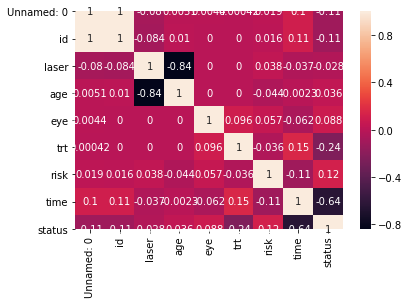

In [55]:
sns.heatmap(dataset.corr(),annot=True)

# Data Visualization

Count-Plot of Status 

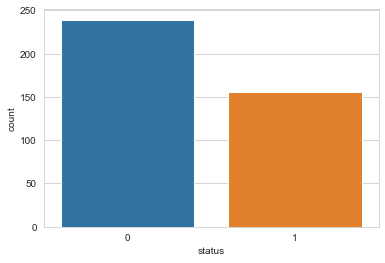

In [77]:
sns.set_style('whitegrid')
sns.countplot(dataset['status'])

Count-Plot of Status with respect to risk

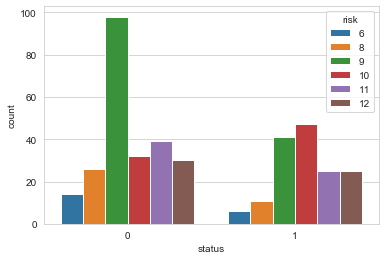

In [78]:
sns.countplot(x='status',hue='risk',data=dataset)

Count-Plot of Status with respect to eye

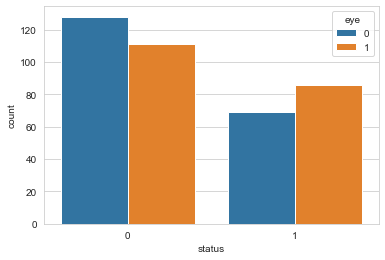

In [79]:
sns.countplot(x='status',hue='eye',data=dataset)

Count-Plot of Status with respect to laser

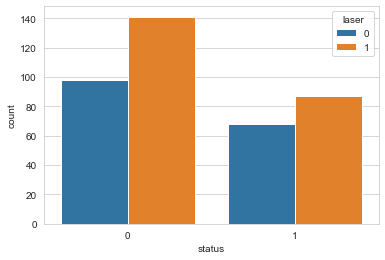

In [80]:
sns.countplot(x='status',hue='laser',data=dataset)

Count-Plot of Status with respect to trt

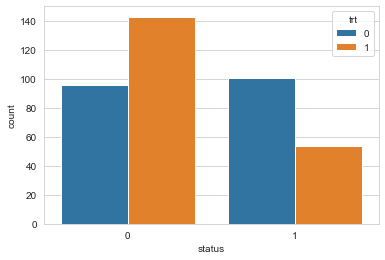

In [81]:
sns.countplot(x='status',hue='trt',data=dataset)

Age variations

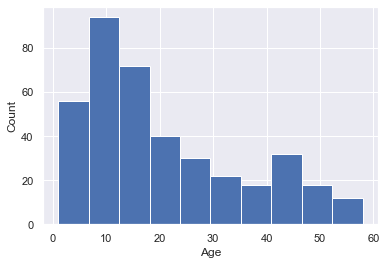

In [88]:
sns.set()

plt.hist(x='age',data=dataset)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [56]:
x = dataset.iloc[:,2:8].values

In [57]:
x

array([[ 0.  , 28.  ,  0.  ,  0.  ,  9.  , 46.23],
       [ 0.  , 28.  ,  1.  ,  1.  ,  9.  , 46.23],
       [ 1.  , 12.  ,  0.  ,  1.  ,  8.  , 42.5 ],
       ...,
       [ 1.  ,  3.  ,  1.  ,  0.  , 10.  ,  1.43],
       [ 0.  , 32.  ,  0.  ,  1.  ,  9.  , 41.93],
       [ 0.  , 32.  ,  1.  ,  0.  ,  9.  , 41.93]])

In [58]:
y = dataset.iloc[:,8].values

In [59]:
y

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,

Training and Testing Splits

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [62]:
x_train

array([[ 1.  , 11.  ,  1.  ,  1.  , 12.  , 32.2 ],
       [ 0.  , 32.  ,  0.  ,  0.  ,  9.  , 38.73],
       [ 0.  , 24.  ,  1.  ,  0.  , 10.  ,  4.27],
       ...,
       [ 1.  , 14.  ,  1.  ,  0.  ,  9.  , 18.9 ],
       [ 1.  ,  1.  ,  1.  ,  1.  , 12.  , 66.2 ],
       [ 1.  ,  8.  ,  0.  ,  0.  , 11.  , 46.3 ]])

In [63]:
x_test

array([[ 0.  , 32.  ,  1.  ,  0.  , 10.  , 39.77],
       [ 1.  , 11.  ,  1.  ,  1.  ,  9.  , 74.93],
       [ 1.  , 10.  ,  0.  ,  0.  , 11.  , 22.  ],
       [ 1.  ,  5.  ,  1.  ,  1.  , 11.  , 60.93],
       [ 0.  , 42.  ,  1.  ,  1.  ,  9.  , 63.87],
       [ 0.  , 51.  ,  1.  ,  0.  , 12.  , 42.77],
       [ 0.  , 23.  ,  1.  ,  0.  , 10.  , 19.4 ],
       [ 0.  , 22.  ,  0.  ,  1.  , 11.  , 63.33],
       [ 0.  , 20.  ,  0.  ,  1.  ,  9.  , 65.23],
       [ 0.  , 41.  ,  0.  ,  0.  ,  9.  , 14.37],
       [ 0.  , 53.  ,  0.  ,  0.  , 12.  ,  1.33],
       [ 0.  , 22.  ,  0.  ,  0.  , 11.  , 42.33],
       [ 0.  , 44.  ,  1.  ,  0.  , 10.  ,  3.67],
       [ 0.  , 32.  ,  1.  ,  0.  ,  9.  , 41.93],
       [ 0.  , 28.  ,  0.  ,  1.  ,  9.  , 10.6 ],
       [ 1.  , 12.  ,  0.  ,  1.  , 11.  , 38.3 ],
       [ 1.  , 15.  ,  0.  ,  0.  , 12.  ,  7.6 ],
       [ 0.  , 21.  ,  0.  ,  0.  ,  9.  , 48.3 ],
       [ 1.  , 14.  ,  1.  ,  1.  , 12.  , 25.83],
       [ 1.  , 13.  ,  0.  ,  0

In [64]:
y_train

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [65]:
y_test

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

Importing Algorithm

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
lr = LogisticRegression()

In [68]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
y_pred = lr.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

Checking Accuracy of our model

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
accuracy_score(y_test,y_pred)*100

77.77777777777779

Testing Model

In [72]:
lr.predict([[1,13,0,0,10,0.30]])

array([1], dtype=int64)

In [73]:
lr.predict([[1,22,1,8,0,46.23]])

array([0], dtype=int64)